# Tecnológico de Costa Rica
## Programa de Ciencia de Datos
### Prof. Felipe Meza Obando,

#### Aprendizaje automático (4B)
#### Tarea-2

--- 
Medio de entrega: Link de GitHub

Entregables: Un archivo jupyter ( .IPYNB ). 

Modo de trabajo: Parejas:
Estudiantes:

Yu Hung Yeh Chai

José Alberto Raygada Agüero

---

Objetivo
El objetivo de la Tarea 2 consiste en elegir un dataset, ejecutar las diferentes tareas de pre-procesado y crear un tutorial sobre el uso de PANDAS

---

## Tutorial para el pre-procesado de un dataset utilizando la librería Pandas

### 1. ¿En qué consiste y por qué es necesario realizar el procesado de nuestro dataset?

Un sistema de Apredizaje Automático (Machine Lerning, ML) no es capaz de reconocer lo que en idioma inglés se conoce como gibberish, que son todos aquellos signos, símbolos o lenguaje en general que no posee un sentido claro y que puede incluir sonidos del habla que no son palabras reales, juegos de lenguaje y jerga especializada que parece absurda para los no especialistas; por tal motivo muy frecuentemente se requiere limpiar nuestro dataset antes de poder aplicar nuestros algoritmos de ML.

## 2. Exploración inicial de los datos

Para decidir cómo limpiar nuestros datos necesitamos estar familiarizados con los mismos. Para tal efecto podemos realizar dos tareas que no son mutuamente excluyentes: primero, escanear los datos y segundo, visualizar la data; esto depende del tipo de datos que estemos manejando, lo más frecuente es que trabajemos con una matriz numérica pero podría tratarse de dataos de imágenes, audio, texto u otro tipo de información.

Lo que deseamos conocer es si la base de datos posee **valores faltantes (missing values)**, cómo se encuentran distribuidos los valores y qué tipo de **características (features)** presenta. 

### 2.1 Manejo de los valores faltantes

Muy frecuentemente se carecerá de valores para ciertas características. Esto puede ocurrir por varias razones, como que sea inconveniente, muy oneroso o a veces imposible encontrar un valor en particular.

La primera respuesta cuando nos encontramos ante valores faltantes es ignorarlos, sin embargo, como se mencionó antes, algunos algoritmos no podrán funcionar con datos incompletos o bien, los resultados podrían no ser precisos.

La segunda solución es sustituir los valores faltantes con un valor fijo - esta técnica se denomina **imputar (imputing)**; podríamos imputar **la media aritmética (mean), la mediana (median) o la moda (mode)** de los valores válidos para una determinada característica. Idealmente deberíamos contar con un conocimiento previo que sea lo suficientemente confiable. 

_____
**Referencias:**

***Python Machine Learning By Example by Yuxi (Hayden) Liu.*** 2020, Third edition. Preprocessing and exploration, pág. 26.

-----

#### Descripción del dataset a utilizar

Se utilizará como data set el registro histórico de erupciones volcánicas tomado del sitio  https://data.world/stuartltinsley/volcanic-eruptions-data-set

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import sklearn
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing

#Funciones
def bold(t):
    """
    Funcion para formatear en negrita el texto.
    t = cualquier dato
    """
    return "\033[1m" + str(t) + "\033[0m"

def newline():
    """
    Funcion para imprimir cambio de linea
    """
    print("\r\n")
    


-----

#### Descripción del dataset a utilizar

Se procede con la carga de datos de estadísticas de videos Trending de videos de USA de Youtube https://www.kaggle.com/datasnaek/youtube-new


In [2]:
df = pd.read_csv(r"usvideos.csv")

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Una de las primeras tareas que debemos aplicar es la identificación de datos no numéricos (NaN)

In [3]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

Se dectectó que la columna "description" es la única que contiene NaN's pero es columna de texto y sin categorías que no agrega valor en el modelo de análisis de Machine Learning, por lo que se va a eliminar esta columna.

In [4]:
df.drop('description', axis='columns', inplace=True)
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed'],
      dtype='object')

In [5]:
# Detalle de columnas originales

df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed'],
      dtype='object')

El siguiente proceso a seguir es la eliminación de todas aquellas columnas que no representan datos numéricos o categorías y por lo tanto no son relevantes para el modelo de ML.

In [6]:
df = df.drop(columns = ['video_id','trending_date','title','channel_title','publish_time','tags','thumbnail_link'])
df.columns

Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed'],
      dtype='object')

Seguidamente se debe hacer otra revisión de los datos para identificar que otro preprocesamiento de datos se requiere:

In [7]:
df

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,22,748374,57527,2966,15954,False,False,False
1,24,2418783,97185,6146,12703,False,False,False
2,23,3191434,146033,5339,8181,False,False,False
3,24,343168,10172,666,2146,False,False,False
4,24,2095731,132235,1989,17518,False,False,False
...,...,...,...,...,...,...,...,...
40944,15,1685609,38160,1385,2657,False,False,False
40945,22,1064798,60008,382,3936,False,False,False
40946,24,1066451,48068,1032,3992,False,False,False
40947,1,5660813,192957,2846,13088,False,False,False


Se nota que las últimas tres columnas muestran valores False y True que deben ser sustituidos por 0 y 1 respectivamente que son valores numéricos que si podemos utilizar en los algoritmos de ML.

In [8]:
df.replace(to_replace=False, value = 0, inplace = True)
df.replace(to_replace=True, value = 1, inplace = True)
df

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,22,748374,57527,2966,15954,0,0,0
1,24,2418783,97185,6146,12703,0,0,0
2,23,3191434,146033,5339,8181,0,0,0
3,24,343168,10172,666,2146,0,0,0
4,24,2095731,132235,1989,17518,0,0,0
...,...,...,...,...,...,...,...,...
40944,15,1685609,38160,1385,2657,0,0,0
40945,22,1064798,60008,382,3936,0,0,0
40946,24,1066451,48068,1032,3992,0,0,0
40947,1,5660813,192957,2846,13088,0,0,0


Una vez que la base de datos se ha depurado con los pasos anteriores se procede a aplicar técnicas de visualización de los datos.

Ploteo de Views versus Likes
----------------------------------------------




<AxesSubplot:xlabel='likes', ylabel='views'>

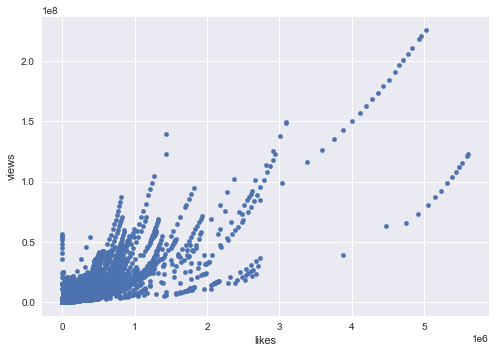

In [9]:
print(bold("Ploteo de Views versus Likes"))
print("----------------------------------------------")
newline()    



matplotlib.style.use('seaborn')

df.plot.scatter(x='likes', y='views')


Basado en el gráfico de dispersión anterior podemos concluir que las variables de likes y Views presentan una alta correlación positiva.

Ploteo de Likes versus Dislikes
----------------------------------------------




<AxesSubplot:xlabel='likes', ylabel='dislikes'>

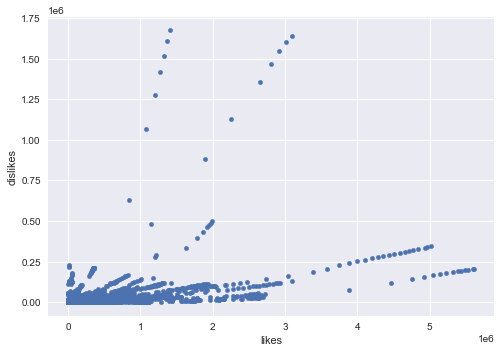

In [10]:
print(bold("Ploteo de Likes versus Dislikes"))
print("----------------------------------------------")
newline()    



matplotlib.style.use('seaborn')

df.plot.scatter(x='likes', y='dislikes')


## 3. Normalización y estandarización (Feature Scaling)

Una de las transformaciones más importantes que deben ser aplicadas a los datos es el escalamiento de características (feature scaling). En la mayoría de los casos, los algorítmos de aprendizaje automático no se desempeñan bien cuando la entrada de atributos numéricos presentan diferentes escalas. Existen dos formas comunes para conseguir que todos los datos de los atributos tengan la misma escala:

1. **Normalización (min-max scaling)**: es la más simple; los valores son cambiados y re-escalados de tal forma que se presenten en un rango de 0 a 1. Lo anterior se logra restando el valor mínimo y dividiendo por el máximo menos el mínimo. 

$$Scaler(x_i)=\frac{x_i-min(x)}{max(x) - min(x)}$$

      
2. **Estandarización:** La estandarización requiere primero restar el valor medio (mean value ${\mu}$), por lo tanto los valores estandarizados siempre presentan una media igual a cero, y después dividir por la desviación estandar (standard deviation ${\sigma}$), de tal forma que la distribución resultante presentará varianza igual a 1.


$$Scaler(x_i)=\frac{x_i-\mu}{\sigma}$$



_____
**Referencias:**

***Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron.*** 2019, second edition. Prepare the Data for Machine Learning Algorithms, Feature Scaling, pág. 69-70.

### Normalización y estandarización

In [11]:
print(bold("Resultado de la normalización y estandarización"))
print("----------------------------------------------")
newline()

scaler = MinMaxScaler()
nombreColumnas = df.columns.to_numpy()
datosNormalizadosEstandarizados = pd.DataFrame(scaler.fit_transform(df), columns = nombreColumnas)

print(datosNormalizadosEstandarizados)


Resultado de la normalización y estandarización
----------------------------------------------


       category_id     views     likes  dislikes  comment_count  \
0         0.500000  0.003321  0.010247  0.001771       0.011717   
1         0.547619  0.010738  0.017312  0.003671       0.009330   
2         0.523810  0.014168  0.026013  0.003189       0.006008   
3         0.547619  0.001521  0.001812  0.000398       0.001576   
4         0.547619  0.009303  0.023555  0.001188       0.012866   
...            ...       ...       ...       ...            ...   
40944     0.333333  0.007482  0.006798  0.000827       0.001951   
40945     0.500000  0.004726  0.010689  0.000228       0.002891   
40946     0.547619  0.004733  0.008562  0.000616       0.002932   
40947     0.000000  0.025133  0.034372  0.001700       0.009612   
40948     0.452381  0.045760  0.063607  0.127194       0.106343   

       comments_disabled  ratings_disabled  video_error_or_removed  
0                    0.0     

Una vez normalizada y estandarizada la data procedemos a plotear de nuevo la información para poder comparar los resultados:

Ploteo de Views versus Likes
----------------------------------------------




<AxesSubplot:xlabel='likes', ylabel='views'>

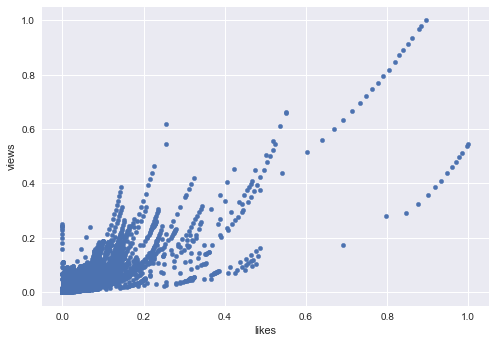

In [12]:
print(bold("Ploteo de Views versus Likes"))
print("----------------------------------------------")
newline()    



matplotlib.style.use('seaborn')

datosNormalizadosEstandarizados.plot.scatter(x='likes', y='views')


Ploteo de Likes versus Dislikes
----------------------------------------------




<AxesSubplot:xlabel='likes', ylabel='dislikes'>

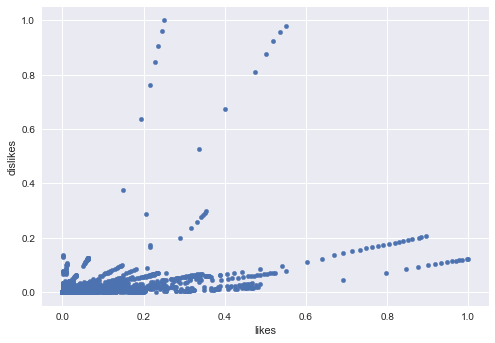

In [14]:
print(bold("Ploteo de Likes versus Dislikes"))
print("----------------------------------------------")
newline()    



matplotlib.style.use('seaborn')

datosNormalizadosEstandarizados.plot.scatter(x='likes', y='dislikes')


Se puede concluir que se normalizó y estandarizó correctamente ya que se mantuvo la misma tendencia en ambos gráfico, con la única diferencia de la escala, que ahora es mucho menor que antes.